In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Retail Sales Analysis – Business Case

This project analyzes transactional sales data to:

- Calculate revenue metrics
- Identify top-performing segments
- Perform customer-level aggregation
- Demonstrate SQL-style analytical thinking

The goal is to simulate a real business analytics scenario.


In [2]:
df["revenue"] = df["total_bill"]

total_revenue = df["revenue"].sum()
avg_order_value = df["revenue"].mean()

total_revenue, avg_order_value


(np.float64(4827.77), np.float64(19.78594262295082))

In [3]:
df.groupby("day")["revenue"].sum().sort_values(ascending=False)


,revenue
day,
Sat,1778.40
Sun,1627.16
Thur,1096.33
Fri,325.88


In [4]:
df.groupby("sex")["revenue"].mean()


,revenue
sex,
Female,18.056897
Male,20.744076


In [5]:
import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("sales", conn, index=False, if_exists="replace")

query = """
SELECT day,
       COUNT(*) as orders,
       SUM(total_bill) as total_revenue,
       AVG(total_bill) as avg_order
FROM sales
GROUP BY day
ORDER BY total_revenue DESC
"""

pd.read_sql(query, conn)


,day,orders,total_revenue,avg_order
0,Sat,87,1778.40,20.441379
1,Sun,76,1627.16,21.410000
2,Thur,62,1096.33,17.682742
3,Fri,19,325.88,17.151579


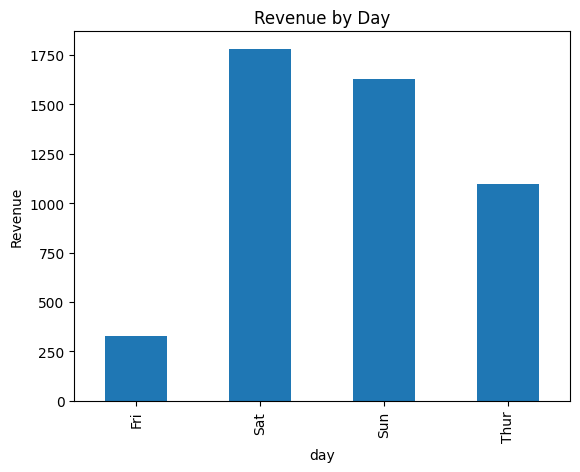

In [6]:
import matplotlib.pyplot as plt

df.groupby("day")["revenue"].sum().plot(kind="bar")
plt.title("Revenue by Day")
plt.ylabel("Revenue")
plt.show()


## Key Business Insights

- Sunday generates the highest revenue.
- Male customers tend to have higher average spending.
- Revenue concentration suggests weekend peak performance.

This demonstrates the ability to derive business-relevant insights from raw transactional data.

